# Follow-Along Activity

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
n_samples = 100_000

transaction_amounts = np.round(np.random.normal(loc=100, scale=20, size=n_samples),2)
transaction_hours = np.round(np.random.normal(loc=13, scale=4, size=n_samples)).astype(int)
transaction_hours = np.clip(transaction_hours, 0, 23)

data = pd.DataFrame({
    'transaction_id': range(1, n_samples + 1),
    'transaction_amount': transaction_amounts,
    'transaction_hour': transaction_hours
})

print(data.head())

   transaction_id  transaction_amount  transaction_hour
0               1              109.93                17
1               2               97.23                 8
2               3              112.95                15
3               4              130.46                11
4               5               95.32                12


In [3]:
anomaly_count = int(0.001 * n_samples)
anomaly_indices = np.random.choice(n_samples, size=anomaly_count, replace=False)

data.loc[anomaly_indices, 'transaction_amount'] = data.loc[anomaly_indices, 'transaction_amount'] * 5


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(data[['transaction_amount', 'transaction_hour']])

model = IsolationForest(contamination=0.001, random_state=42, verbose=1)
model.fit(scaled)
data['anomaly'] = model.predict(scaled)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


In [8]:
# Display detected anomalies
print("\nDetected Anomalies:\n")
print(data[data['anomaly'] == -1].head())


Detected Anomalies:

      transaction_id  transaction_amount  transaction_hour  anomaly
1464            1465              441.95                11       -1
2429            2430              466.60                 5       -1
3713            3714               57.35                 0       -1
4725            4726               36.59                23       -1
5535            5536              150.02                 1       -1


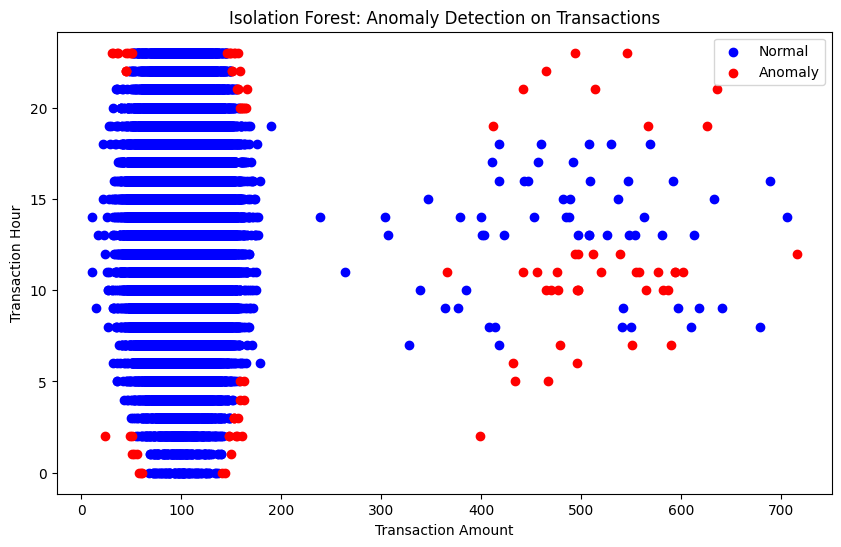

In [9]:
plt.figure(figsize=(10, 6))

for label, colour in [(1, 'blue'), (-1, 'red')]:
    subset = data[data['anomaly'] == label]
    plt.scatter(subset['transaction_amount'],
                subset['transaction_hour'],
                c=colour,
                label='Normal' if label == 1 else 'Anomaly')

plt.xlabel('Transaction Amount')
plt.ylabel('Transaction Hour')
plt.title('Isolation Forest: Anomaly Detection on Transactions')
plt.legend()

# Generate jpeg for textbook publication
plt.savefig('Figure 14.16 Isolation Forest.jpeg', dpi=300)

plt.show()


# Your Project

Saving 14_your_project_isolation_forest.csv to 14_your_project_isolation_forest.csv

Sample Detected Anomalies:

      supplier_id  invoice_amount  days_to_pay  anomaly
1543         1394         1335.45          2.0       -1
4421         1805         1109.01          2.0       -1
4746         1694         1549.92          2.0       -1
4803         1772         1245.15          0.0       -1
6140         1317         2209.45          2.0       -1


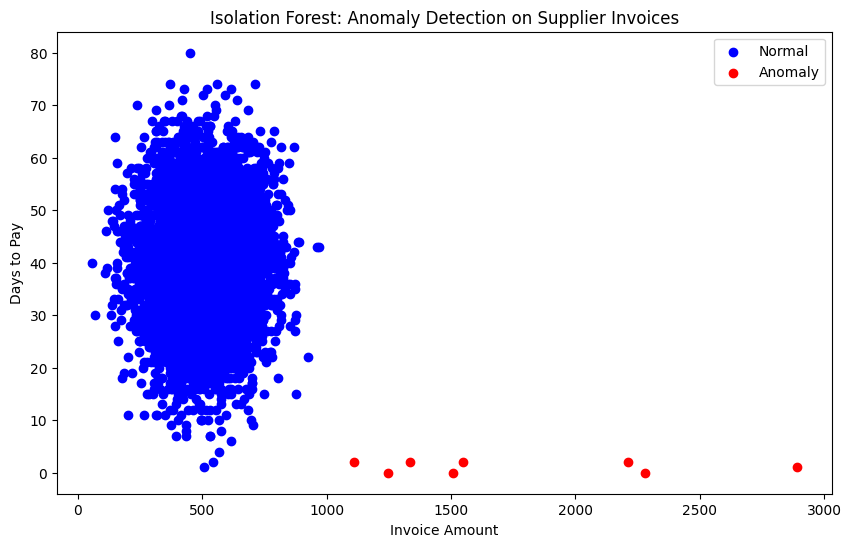

In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from google.colab import files

# Step 2: Upload the CSV file and load the uploaded file
uploaded = files.upload()
df = pd.read_csv("13_your_project_isolation_forest.csv")

# Step 3: Scale the features and peform analysis
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['invoice_amount', 'days_to_pay']])
model = IsolationForest(contamination=0.001)
model.fit(scaled)
df['anomaly'] = model.predict(scaled)  # 1 = normal, -1 = anomaly

# Step 4: Display sample anomalies
print("\nSample Detected Anomalies:\n")
print(df[df['anomaly'] == -1].head())

# Step 5: Plot results
plt.figure(figsize=(10, 6))
for label, colour in [(1, 'blue'), (-1, 'red')]:
    subset = df[df['anomaly'] == label]
    plt.scatter(subset['invoice_amount'],
                subset['days_to_pay'],
                c=colour,
                label='Normal' if label == 1 else 'Anomaly')

plt.xlabel('Invoice Amount')
plt.ylabel('Days to Pay')
plt.title('Isolation Forest: Anomaly Detection on Supplier Invoices')
plt.legend()
plt.show()

